# Préparation initiale dataset

## Récupération du dataset et filtres de données

In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns

import nltk
import pickle
import time
import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere
import itertools

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
import tensorflow as tf
import tensorflow.keras
import tensorflow_hub as hub

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim


In [4]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model


In [5]:
# Bert
import os
import transformers
from transformers import *
os.environ["TF_KERAS"]='1'


In [2]:
#Importing the required libraries
import cv2
import zipfile
from random import shuffle
from tqdm import tqdm

from tensorflow.keras import datasets, layers, models


In [7]:
df_original=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
# df_original = pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample_1050.csv")

df_original.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [9]:
df_original.product_category_tree.nunique()

642

Ma mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.


Ваша миссия — провести первое технико-экономическое обоснование механизма классификации статей на основе изображения и описания для автоматизации присвоения категории статьи.

In [10]:
df_original=df_original[['uniq_id', 'product_name', 'product_category_tree', 'image', 'description']]
df_original.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

## Nettoyage du texte

In [11]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# from nltk.tokenize import sent_tokenize, word_tokenize

In [12]:
# Tokenizer
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [13]:
df_original['sentence_bow'] = df_original['description'].apply(lambda x : transform_bow_fct(x))
df_original['sentence_bow_lem'] = df_original['description'].apply(lambda x : transform_bow_lem_fct(x))
df_original['sentence_dl'] = df_original['description'].apply(lambda x : transform_dl_fct(x))
df_original.shape

(1050, 8)

In [14]:
df_original.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel (...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

# Préparation commune des traitements (Совместная подготовка обработок)


## Lecture dataset (Чтение набора данных)

In [15]:
df_original.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel (...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [16]:
new = df_original["product_category_tree"].str.split(" >> ", n = 2, expand = True)
  
# making separate first name column from new data frame
df_original["first_category"]= new[0]
  
# making separate last name column from new data frame
df_original["second_category"]= new[1]

In [17]:
df_original['first_category'] = df_original['first_category'].apply(lambda x : transform_bow_fct(x))


In [18]:
df_original['first_category'].nunique()

7

In [19]:
df_original['first_category'].unique()

array(['home furnishing', 'baby care', 'watches',
       'home decor festive needs', 'kitchen dining',
       'beauty personal care', 'computers'], dtype=object)

In [20]:
l_cat = list(set(df_original['first_category']))
print("catégories : ", l_cat)
y_cat_num = [(0+l_cat.index(df_original.iloc[i]['first_category'])) for i in range(len(df_original))]

catégories :  ['computers', 'kitchen dining', 'home decor festive needs', 'home furnishing', 'baby care', 'watches', 'beauty personal care']


In [21]:
y_cat_num

[3,
 4,
 4,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 4,
 3,
 4,
 6,
 1,
 1,
 1,
 0,
 1,
 6,
 1,
 0,
 1,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 3,
 1,
 4,
 4,
 4,
 6,
 6,
 3,
 4,
 2,
 2,
 4,
 4,
 2,
 2,
 1,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 1,
 4,
 0,
 2,
 4,
 2,
 0,
 3,
 4,
 0,
 2,
 6,
 6,
 6,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 4,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,


In [22]:
df=df_original

In [23]:
category = pd.DataFrame(y_cat_num, index=df.index)
category.head()

0
0  3
1  4
2  4
3  3
4  3

In [24]:
dictionary={0: 'y_cat'}
category=category.rename(dictionary, axis=1)
category.head()

y_cat
0      3
1      4
2      4
3      3
4      3

In [25]:
df=pd.concat([df,category], axis=1)
df.head(20)

uniq_id  \
0   55b85ea15a1536d46b7190ad6fff8ce7   
1   7b72c92c2f6c40268628ec5f14c6d590   
2   64d5d4a258243731dc7bbb1eef49ad74   
3   d4684dcdc759dd9cdf41504698d737d8   
4   6325b6870c54cd47be6ebfbffa620ec7   
5   893aa5ed55f7cff2eccea7758d7a86bd   
6   f355cc1ccb08bd0d283ed979b7ee7515   
7   dd0e3470a7e6ed76fd69c2da27721041   
8   41384da51732c0b4df3de8f395714fbb   
9   710ed5f2393a4b9e8823aa0029f71f93   
10  920154acbe49d3202ed7d2ed2df1ea13   
11  08452abdadb3db1e686b94a9c52fc7b6   
12  1e8741b5ae27a513546c94b3f3312aee   
13  189fa66a5fa6f08d2802a62ecf0be298   
14  bbb8cdc5406ff60ff06ff64630f2ca47   
15  1120bc768623572513df956172ffefeb   
16  5479bb7028827d60000720a2c135976a   
17  733aa1e801a139fa8dc7be9f0eff5ee0   
18  62c35de4df27437d3597963fac55a8b6   
19  33d97d63c037078cd3f08033966d6a88   

                                         product_name  \
0   Elegance Polyester Multicolor Abstract Eyelet ...   
1                          Sathiyas Cotton Bath Towel   
2                 Eurospa Cotton Terry Face Towel Set   
3   SANTOSH ROYAL FASHION Cotton Printed King size...   
4   Jaipur Print Cotton Floral King sized Double B...   
5   Maserati Time R8851116001 Analog Watch  - For ...   
6   Camerii WM64 Elegance Analog Watch  - For Men,...   
7   T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8   Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   
10  Calibro SW-125 Analog-Digital Watch  - For Men...   
11     Cartier W6701005 Analog Watch  - For Boys, Men   
12  Lois Caron LCS-4032 Analog Watch  - For Boys, Men   
13       Titan 1639SL03 Analog Watch  - For Boys, Men   
14  Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...   
15  Escort E-1700-906_Blk Analog Watch  - For Men,...   
16      Jack klein BlackLed Digital Watch  - For Boys   
17  North Moon IW-005-FK Silicone Ion Digital Watc...   
18   Franck Bella FB74C Analog Watch  - For Boys, Men   
19  Ridas Apl_led_black Apple Shape Digital Watch ...   

                                product_category_tree  \
0   ["Home Furnishing >> Curtains & Accessories >>...   
1   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
5   ["Watches >> Wrist Watches >> Maserati Time Wr...   
6   ["Watches >> Wrist Watches >> Camerii Wrist Wa...   
7   ["Watches >> Wrist Watches >> T STAR Wrist Wat...   
8   ["Watches >> Wrist Watches >> Alfajr Wrist Wat...   
9   ["Watches >> Wrist Watches >> TAG Heuer Wrist ...   
10  ["Watches >> Wrist Watches >> Calibro Wrist Wa...   
11  ["Watches >> Wrist Watches >> Cartier Wrist Wa...   
12  ["Watches >> Wrist Watches >> Lois Caron Wrist...   
13  ["Watches >> Wrist Watches >> Titan Wrist Watc...   
14  ["Watches >> Wrist Watches >> Srushti Art Jewe...   
15  ["Watches >> Wrist Watches >> Escort Wrist Wat...   
16  ["Watches >> Wrist Watches >> Jack klein Wrist...   
17  ["Watches >> Wrist Watches >> North Moon Wrist...   
18  ["Watches >> Wrist Watches >> Franck Bella Wri...   
19  ["Watches >> Wrist Watches >> Ridas Wrist Watc...   

                                   image  \
0   55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1   7b72c92c2f6c40268628ec5f14c6d590.jpg   
2   64d5d4a258243731dc7bbb1eef49ad74.jpg   
3   d4684dcdc759dd9cdf41504698d737d8.jpg   
4   6325b6870c54cd47be6ebfbffa620ec7.jpg   
5   893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6   f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7   dd0e3470a7e6ed76fd69c2da27721041.jpg   
8   41384da51732c0b4df3de8f395714fbb.jpg   
9   710ed5f2393a4b9e8823aa0029f71f93.jpg   
10  920154acbe49d3202ed7d2ed2df1ea13.jpg   
11  08452abdadb3db1e686b94a9c52fc7b6.jpg   
12  1e8741b5ae27a513546c94b3f3312aee.jpg   
13  189fa66a5fa6f08d2802a62ecf0be298.jpg   
14  bbb8cdc5406ff60ff06ff64630f2ca47.jpg   
15  1120bc768623572513df956172ffefeb.jpg   
16  5479bb7028827d60000720a2c135976a.jpg   


In [26]:
# from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["description"].apply(tokenizer.tokenize)
df.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl   first_category  \
0  key features of elegance polyester multicolor ...  home furnishing   
1  specifications of sathiyas cotton bath towel (...        baby care   
2  key features of eurospa cotton terry face towe...        baby care   
3  key features of santosh royal fashion cotton p...  home furnishing   
4  key features of jaipur print cotton floral kin...  home furnishing   

          second_category  y_cat  \
0  Curtains & Accessories      3   
1        Baby Bath & Skin      4   
2        Baby Bath & Skin      4   
3               Bed Linen      3   
4               Bed Linen      3   

                                              tokens  
0  [Key, Features, of, Elegance, Polyester, Multi...  
1  [Specifications, of, Sathiyas, Cotton, Bath, T...  
2  [Key, Features, of, Eurospa, Cotton, Terry, Fa...  
3  [Key, Features, of, SANTOSH, ROYAL, FASHION, C...  
4  [Key, Features, of, Jaipur, Print, Cotton, Flo...

In [27]:
all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

81563 words total, with a vocabulary size of 7670
Max sentence length is 584


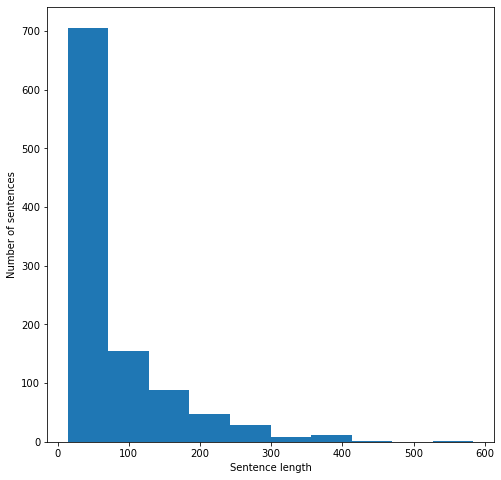

In [28]:
fig = plt.figure(figsize=(8, 8)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [29]:
# from nltk.tokenize import sent_tokenize, word_tokenize
df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())

df['length_bow_lem'] = df['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", df['length_bow_lem'].max())

df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())


max length bow :  379
max length bow lem :  379
max length dl :  632


## Fonctions communes (Общие функции)

In [30]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1') 
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)



# Bag of word - Tf-idf

## Préparation sentences

In [31]:
# création du bag of words (CountVectorizer et Tf-idf)
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat])  

## Exécution des modèles

In [32]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)

CountVectorizer : 
-----------------
ARI :  0.3842 time :  22.0


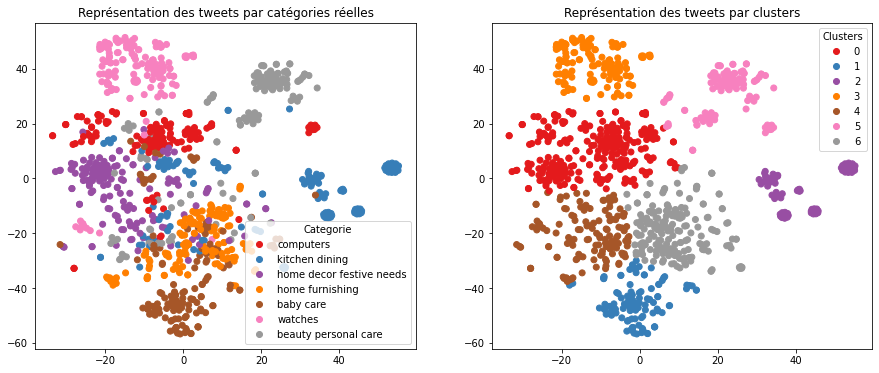

ARI :  0.3842


In [33]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [34]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.4282 time :  18.0


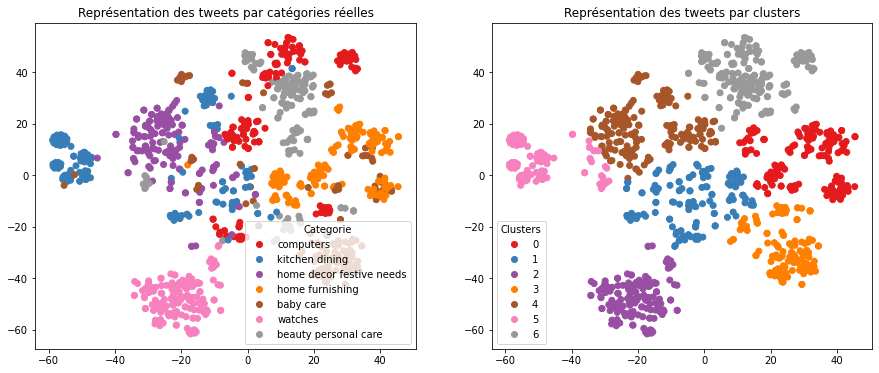

ARI :  0.4282


In [35]:
TSNE_visu_fct(X_tsne, y_cat_num,labels, ARI)

## Enter embeddings (введите вложения)

Естественным способом представления текста для компьютеров является кодирование каждого символа по отдельности, что кажется совершенно неадекватным для представления и понимания языка. Наша цель — сначала создать полезное вложение для каждого предложения (или описания товара) в нашем наборе данных, а затем использовать эти вложения для точного прогнозирования соответствующей категории.

Самый простой подход, с которого мы можем начать, — это использовать модель мешка слов и применить к ней логистическую регрессию. Пакет слов просто связывает индекс с каждым словом в нашем словаре и встраивает каждое предложение в виде списка нулей, с 1 в каждом индексе, соответствующем слову, присутствующему в предложении.

### Bag of Words Counts

In [ ]:
# from sklearn.model_selection import train_test_split

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["sentence_bow_lem"].tolist()
list_labels = y_cat_num

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

#### Visualizing the embeddings

Теперь, когда мы создали вложения, давайте визуализируем их и посмотрим, сможем ли мы определить какую-то структуру. В идеальном мире наши вложения были бы настолько различны, что наши категории были бы идеально разделены. Поскольку визуализировать данные в 20 тысячах измерений сложно, давайте спроецируем их до 2.

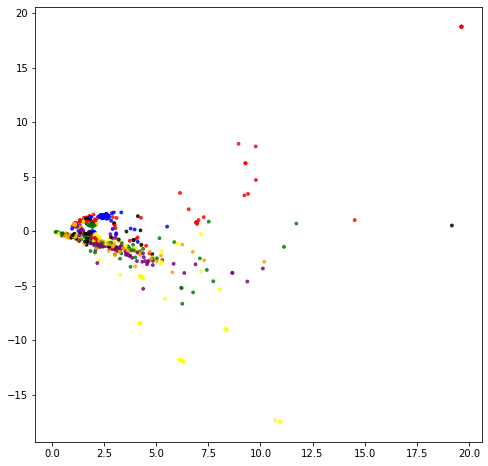

In [ ]:
# from sklearn.decomposition import PCA, TruncatedSVD
# import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','green', 'red', 'purple', 'black', 'yellow']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            

fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_counts, y_train)
plt.show()

Эти вложения не выглядят очень четко разделенными. Посмотрим, сможем ли мы поместить на них полезную модель. (ne semblent pas être très clairement séparées. Voyons si nous pouvons leur attribuer un modèle d'utilité.)

####  Logistic regression

Начать с логистической регрессии — хорошая идея. Он прост, часто выполняет свою работу и его легко интерпретировать.

In [ ]:
# from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

#### Evaluation (Оценка)

Давайте начнем с рассмотрения некоторых показателей, чтобы увидеть, хорошо ли работает наш классификатор.

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.933, precision = 0.942, recall = 0.933, f1 = 0.932


#### Inspection (Осмотр)

Метрика — это одно, но чтобы принять действенное решение, нам нужно проверить, какие ошибки допускает наш классификатор. Начнем с рассмотрения матрицы путаницы.

In [ ]:
# import itertools
# from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

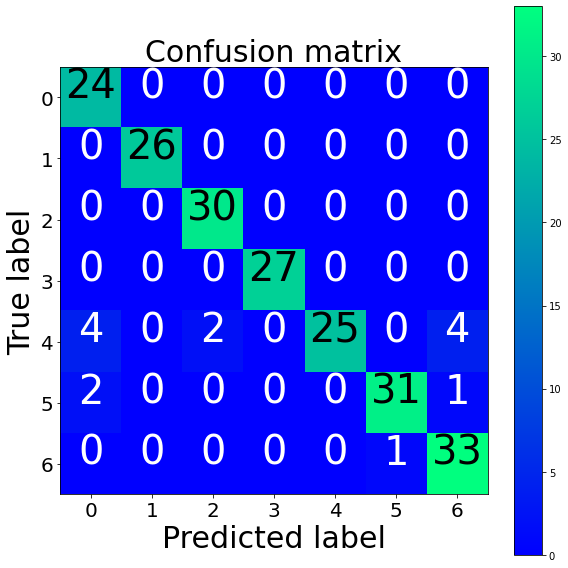

[[24  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 27  0  0  0]
 [ 4  0  2  0 25  0  4]
 [ 2  0  0  0  0 31  1]
 [ 0  0  0  0  0  1 33]]


In [ ]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm,classes=['0', '1','2', '3','4','5','6'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

#### Vérification supplémentaire (Дальнейшая проверка)
Jetons un coup d'œil aux fonctionnalités que notre classificateur utilise pour prendre des décisions.(
Давайте посмотрим на функции, которые наш классификатор использует для принятия решений.)

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [ ]:
importance 

{0: {'bottom': [(-1.0225193393245058, '980'),
   (-1.0225193393245058, 'carter'),
   (-1.0893567288948147, '170'),
   (-1.0895655563683646, 'neyth'),
   (-1.187380584044274, 'offspring'),
   (-1.2706765092542944, 'babybucket'),
   (-1.2706999393430647, '735'),
   (-1.5098945548972567, 'replacement'),
   (-1.5253901378426282, 'guarantee'),
   (-1.5674605669181523, 'day')],
  'tops': [(0.8389748170488747, 'comforter'),
   (0.8684424375477385, 'double'),
   (0.8687506087258825, 'quilt'),
   (0.900446916102805, 'polyester'),
   (0.9007570592447177, 'bucket'),
   (0.925617850454857, 'abstract'),
   (0.9271260260411661, '1395'),
   (0.9546390351486953, 'dohar'),
   (0.9627612363596423, 'cushion'),
   (1.0947516472467105, '1195')]},
 1: {'bottom': [(-0.090536374535094, 'design'),
   (-0.091126438719533, 'blue'),
   (-0.09341587189981862, 'combo'),
   (-0.0950000199796632, 'multicolor'),
   (-0.10247077030029411, 'showpiece'),
   (-0.12457031709804127, 'wall'),
   (-0.12587700923117245, 'model

### TFIDF Bag of Words

Давайте попробуем немного более тонкий подход. В дополнение к нашей модели мешка слов мы используем TF-IDF (частота терминов, обратная частота документа), что означает взвешивание слов по частоте их появления в нашем наборе данных, исключая слишком частые слова, поскольку они просто добавляют шума.

Essayons une approche un peu plus subtile. En plus de notre modèle de sac de mots, nous utilisons un TF-IDF (Term Frequency, Inverse Document Frequency) qui signifie peser les mots en fonction de leur fréquence dans notre ensemble de données, en écartant les mots trop fréquents, car ils ne font qu'ajouter au bruit .

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

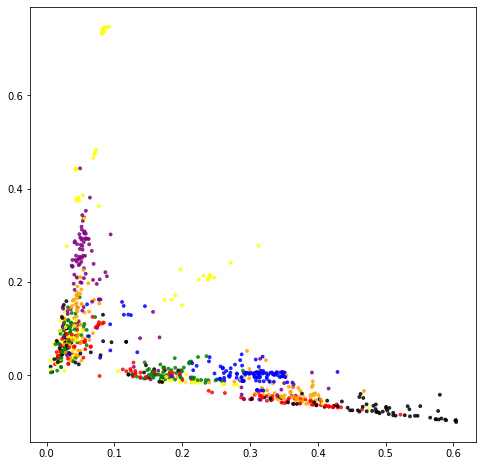

In [ ]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [ ]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.952, precision = 0.959, recall = 0.952, f1 = 0.952


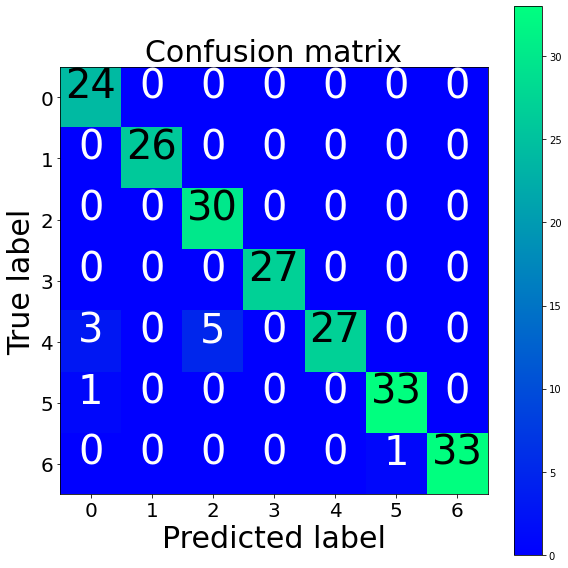

TFIDF confusion matrix
[[24  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 27  0  0  0]
 [ 3  0  5  0 27  0  0]
 [ 1  0  0  0  0 33  0]
 [ 0  0  0  0  0  1 33]]
BoW confusion matrix
[[24  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 27  0  0  0]
 [ 4  0  2  0 25  0  4]
 [ 2  0  0  0  0 31  1]
 [ 0  0  0  0  0  1 33]]


In [ ]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm2, classes=['0', '1','2', '3','4','5','6'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)
importance_tfidf

{0: {'bottom': [(-1.7244227239520553, '980'),
   (-1.7244227239520553, 'carter'),
   (-1.7690836790833602, 'offspring'),
   (-1.7993757205255176, '479'),
   (-1.8251779253617912, 'for'),
   (-2.04449640432802, 'online'),
   (-2.0595072333019995, 'baby'),
   (-2.8707204260908727, 'day'),
   (-2.9770684501191553, 'replacement'),
   (-3.0577700957963745, 'guarantee')],
  'tops': [(3.0960916907743825, 'carpet'),
   (3.1348023782732537, 'curtain'),
   (3.183917300248373, 'cotton'),
   (3.1862826294602007, 'abstract'),
   (3.8057566555265345, 'quilt'),
   (3.9134708498156985, 'polyester'),
   (3.9277289892829685, 'cover'),
   (4.049016335662123, 'blanket'),
   (4.3398981049381975, 'towel'),
   (4.836221675637381, 'cushion')]},
 1: {'bottom': [(-0.7005300956634778, 'wall'),
   (-0.7117053794432042, 'inch'),
   (-0.7144644995627961, 'cotton'),
   (-0.7361051260019786, 'model'),
   (-0.7508101004651532, 'combo'),
   (-0.7580504337490571, 'baby'),
   (-0.9707742383243132, 'showpiece'),
   (-1.17

#### Улавливание смыслового значения

Нашим первым моделям удалось уловить высокие сигнальные слова. Однако маловероятно, что у нас будет обучающий набор, содержащий все релевантные слова. Чтобы решить эту проблему, нам нужно уловить семантическое значение слов. То есть надо понимать, что слова вроде «хорошо» и «позитивно» ближе, чем абрикос и «континент».

# Word2Vec

Word2vec — это модель, которая была предварительно обучена на очень большом корпусе и предоставляет вложения, которые сопоставляют слова, похожие друг на друга. Быстрый способ встроить предложение для нашего классификатора — усреднить оценки word2vec всех слов в нашем предложении.

In [ ]:
#! pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [47]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 380 # adapt to length of sentences
sentences = df['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
sentences

[['key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'height',
  'pack',
  'price',
  'this',
  'curtain',
  'enhances',
  'look',
  'interiors',
  'this',
  'curtain',
  'made',
  'high',
  'quality',
  'polyester',
  'fabric',
  'it',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'it',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'this',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'the',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'these',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want'

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window, vector_size = w2v_size, seed=42, workers=1) 
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4713
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4714


## Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300  
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4714, 300)


## Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 380)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 380, 300)          1414200   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,414,200
Trainable params: 1,414,200
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 8ms/step


(1050, 300)

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3208 time :  46.0


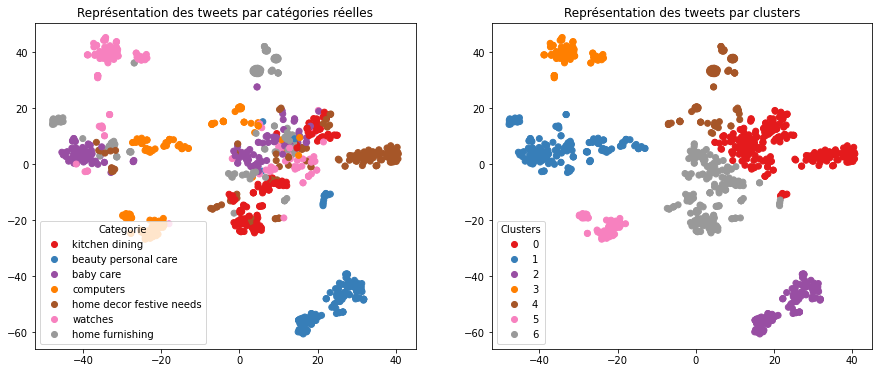

ARI :  0.3208


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

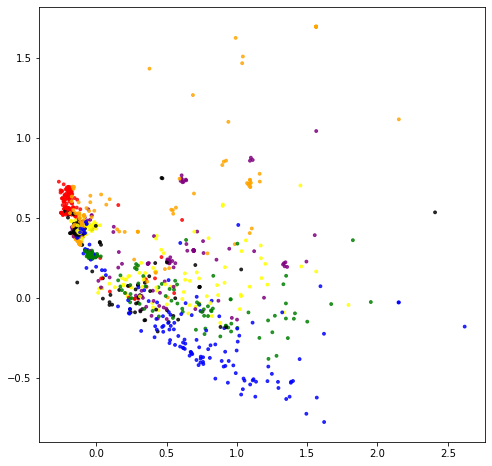

In [ ]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(embeddings, list_labels)
plt.show()


In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

C:\Users\sanni\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.929, precision = 0.930, recall = 0.929, f1 = 0.927


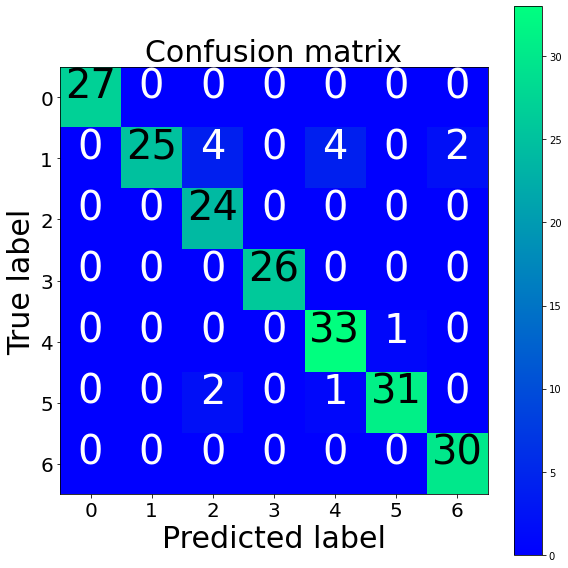

Word2Vec confusion matrix
[[27  0  0  0  0  0  0]
 [ 0 25  4  0  1  1  4]
 [ 0  1 23  0  0  0  0]
 [ 0  0  0 26  0  0  0]
 [ 0  0  0  0 33  0  1]
 [ 0  2  0  0  0 32  0]
 [ 0  0  0  0  1  0 29]]
TFIDF confusion matrix
[[27  0  0  0  0  0  0]
 [ 0 27  3  0  0  0  5]
 [ 0  0 24  0  0  0  0]
 [ 0  0  0 26  0  0  0]
 [ 0  0  0  0 33  1  0]
 [ 0  0  1  0  0 33  0]
 [ 0  0  0  0  0  0 30]]
BoW confusion matrix
[[27  0  0  0  0  0  0]
 [ 0 25  4  0  4  0  2]
 [ 0  0 24  0  0  0  0]
 [ 0  0  0 26  0  0  0]
 [ 0  0  0  0 33  1  0]
 [ 0  0  2  0  1 31  0]
 [ 0  0  0  0  0  0 30]]


In [ ]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm, classes=['0', '1','2', '3','4','5','6'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

### Использование структуры текста
Наши модели работают лучше, но они полностью игнорируют структуру. Чтобы увидеть, поможет ли уловить еще какое-то чувство структуры, мы попробуем последнюю, более сложную модель.

### CNNs for text classification

Здесь мы будем использовать сверточную нейронную сеть для классификации предложений. Хотя они не так популярны, как RNN, было доказано, что они дают конкурентоспособные результаты (иногда превосходя лучшие модели) и очень быстро обучаются.

Во-первых, давайте встроим наш текст.

In [ ]:
df.head()

product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
d4684dcdc759dd9cdf41504698d737d8  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
6325b6870c54cd47be6ebfbffa620ec7  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...   
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...   
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...   
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...   

                                                                       sentence_bow  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features elegance polyester multicolor abs...   
7b72c92c2f6c40268628ec5f14c6d590  specifications sathiyas cotton bath towel bath...   
64d5d4a258243731dc7bbb1eef49ad74  key features eurospa cotton terry face towel s...   
d4684dcdc759dd9cdf41504698d737d8  key features santosh royal fashion cotton prin...   
6325b6870c54cd47be6ebfbffa620ec7  key features jaipur print cotton floral king s...   

                                                                   sentence_bow_lem  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key feature elegance polyester multicolor abst...   
7b72c92c2f6c40268628ec5f14c6d590  specification sathiyas cotton bath towel bath ...   
64d5d4a258243731dc7bbb1eef49ad74  key feature eurospa cotton terry face towel se...   
d4684dcdc759dd9cdf41504698d737d8  key feature santosh royal fashion cotton print...   
6325b6870c54cd47be6ebfbffa620ec7  key feature jaipur print cotton floral king si...   

                                                                        sentence_dl  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features of elegance polyester multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  specifications of sathiyas cotton bath towel (...   
64d5d4a258243731dc7bbb1eef49ad74  key features of eurospa cotton terry face towe...   
d4684dcdc759dd9cdf41504698d737d8  key features of santosh royal fas

In [ ]:
word2vec=model_vectors

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df["description"].tolist())
sequences = tokenizer.texts_to_sequences(df["description"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(y_cat_num, 7)

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 6301 unique tokens.
(6302, 300)


Теперь мы определим простую свёрточную нейронную сеть.

In [ ]:
# from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
# from keras.layers import Conv1D, MaxPooling1D, Embedding
# from keras.layers import LSTM, Bidirectional
# from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

Теперь давайте обучим нашу нейронную сеть.

In [ ]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(df["y_cat"].unique())), False)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Epoch 1/3
7/7 [==============================] - 5s 110ms/step - loss: 3.7194 - acc: 0.3536 - val_loss: 1.3150 - val_acc: 0.5571
Epoch 2/3
7/7 [==============================] - 0s 69ms/step - loss: 1.1435 - acc: 0.5905 - val_loss: 1.0308 - val_acc: 0.6619
Epoch 3/3
7/7 [==============================] - 0s 67ms/step - loss: 0.8573 - acc: 0.7000 - val_loss: 0.7075 - val_acc: 0.7667


# BERT

In [ ]:
# !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 14.5 MB/s 
     |████████████████████████████████| 6.6 MB 36.9 MB/s 
     |████████████████████████████████| 596 kB 35.0 MB/s 
     |████████████████████████████████| 86 kB 2.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras

from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


## Fonctions communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [ ]:
max_length = 64 # что это значит?
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  279.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3255 time :  13.0


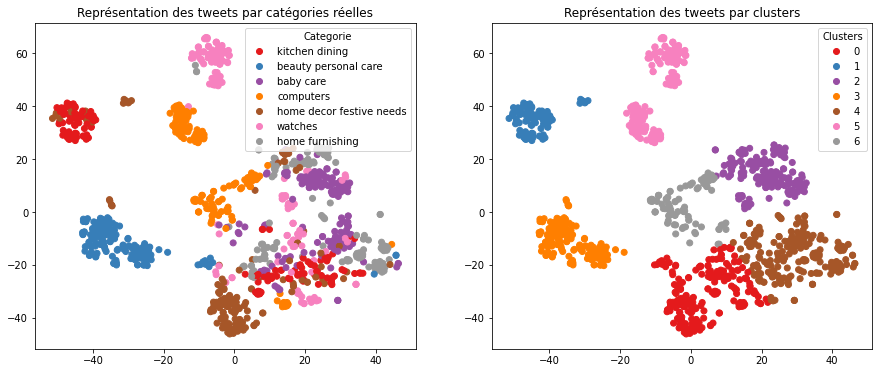

ARI :  0.3255


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [ ]:
# pip install tensorflow_hub

In [ ]:
#!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 9.4 MB/s 
     |████████████████████████████████| 511.7 MB 4.6 kB/s 
     |████████████████████████████████| 438 kB 24.5 MB/s 
     |████████████████████████████████| 5.8 MB 46.7 MB/s 
     |████████████████████████████████| 1.6 MB 48.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
# pip install keras-bert

In [ ]:
# import tensorflow_hub as hub
# import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
# from keras_bert import load_trained_model_from_checkpoint
# папка, куда распаковали преодобученную нейросеть BERT
# folder = 'Desktop//OpenClassRoom//Базы_данных//multi_cased_L-12_H-768_A-12'

# config_path = folder+'/bert_config.json'
# checkpoint_path = folder+'/bert_model.ckpt'
# vocab_path = folder+'/vocab.txt'

# model = load_trained_model_from_checkpoint(config_path, checkpoint_path, training=True)
# model.summary()

In [ ]:
sentences = df['sentence_dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  216.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3128 time :  13.0


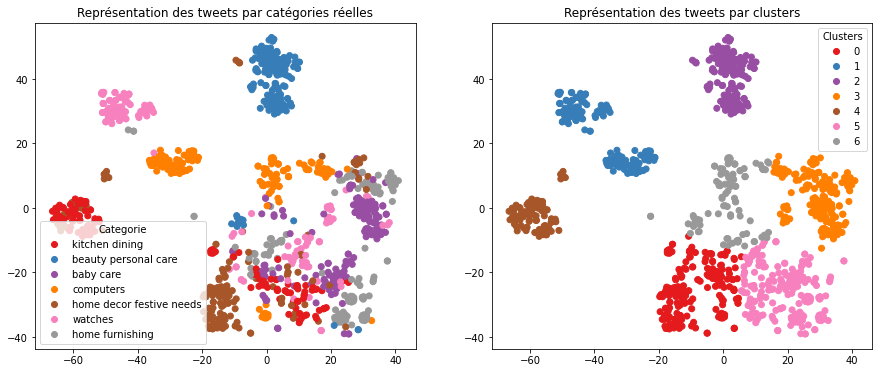

ARI :  0.3128


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [ ]:
# !pip install transformers
# !pip install sacremoses

import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'  # Что это значит?

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 15.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4acd040450523f1c937b8b0f6d0b2144089629e638a20ae3e872babb69a71bd4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.2
2.8.2
Num GPUs Available:  0
True


In [ ]:
# import tensorflow_hub as hub

#embed = hub.load("Desktop//OpenClassRoom//Базы_данных//universal-sentence-encoder_4//saved_model")
# embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/2")


In [ ]:
# import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = df['sentence_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.439 time :  33.0


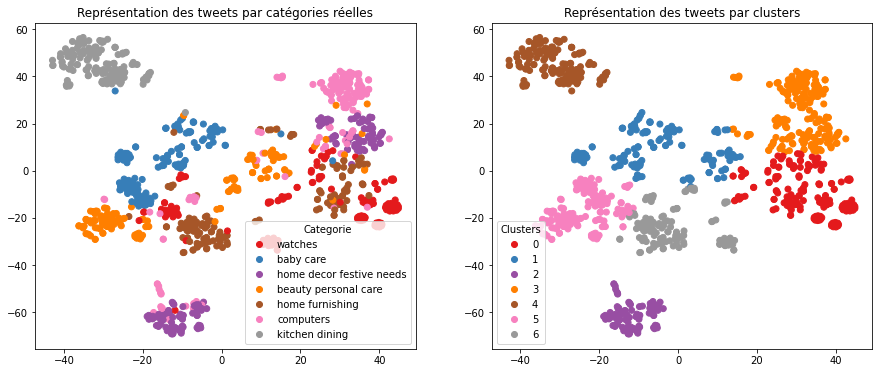

ARI :  0.439


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Extraction de features d'image

## Un algorithme de type CNN Transfer Learning.

In [30]:
df.head(2)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   

                                         sentence_dl   first_category  \
0  key features of elegance polyester multicolor ...  home furnishing   
1  specifications of sathiyas cotton bath towel (...        baby care   

          second_category  y_cat  \
0  Curtains & Accessories      1   
1        Baby Bath & Skin      0   

                                              tokens  length_bow  \
0  [Key, Features, of, Elegance, Polyester, Multi...         156   
1  [Specifications, of, Sathiyas, Cotton, Bath, T...          63   

   length_bow_lem  length_dl  
0             156        248  
1              63         84

In [31]:
df.first_category.unique()

array(['home furnishing', 'baby care', 'watches',
       'home decor festive needs', 'kitchen dining',
       'beauty personal care', 'computers'], dtype=object)

In [32]:
df.y_cat

0       1
1       0
2       0
3       1
4       1
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: y_cat, Length: 1050, dtype: int64

In [33]:
df[['image', 'y_cat', 'first_category']].head(20)

image  y_cat   first_category
0   55b85ea15a1536d46b7190ad6fff8ce7.jpg      1  home furnishing
1   7b72c92c2f6c40268628ec5f14c6d590.jpg      0        baby care
2   64d5d4a258243731dc7bbb1eef49ad74.jpg      0        baby care
3   d4684dcdc759dd9cdf41504698d737d8.jpg      1  home furnishing
4   6325b6870c54cd47be6ebfbffa620ec7.jpg      1  home furnishing
5   893aa5ed55f7cff2eccea7758d7a86bd.jpg      5          watches
6   f355cc1ccb08bd0d283ed979b7ee7515.jpg      5          watches
7   dd0e3470a7e6ed76fd69c2da27721041.jpg      5          watches
8   41384da51732c0b4df3de8f395714fbb.jpg      5          watches
9   710ed5f2393a4b9e8823aa0029f71f93.jpg      5          watches
10  920154acbe49d3202ed7d2ed2df1ea13.jpg      5          watches
11  08452abdadb3db1e686b94a9c52fc7b6.jpg      5          watches
12  1e8741b5ae27a513546c94b3f3312aee.jpg      5          watches
13  189fa66a5fa6f08d2802a62ecf0be298.jpg      5          watches
14  bbb8cdc5406ff60ff06ff64630f2ca47.jpg      5          watches
15  1120bc768623572513df956172ffefeb.jpg      5          watches
16  5479bb7028827d60000720a2c135976a.jpg      5          watches
17  733aa1e801a139fa8dc7be9f0eff5ee0.jpg      5          watches
18  62c35de4df27437d3597963fac55a8b6.jpg      5          watches
19  33d97d63c037078cd3f08033966d6a88.jpg      5          watches

In [34]:
for index, row in df[['image', 'y_cat']].iterrows():
    print(index, row)

0 image    55b85ea15a1536d46b7190ad6fff8ce7.jpg
y_cat                                       1
Name: 0, dtype: object
1 image    7b72c92c2f6c40268628ec5f14c6d590.jpg
y_cat                                       0
Name: 1, dtype: object
2 image    64d5d4a258243731dc7bbb1eef49ad74.jpg
y_cat                                       0
Name: 2, dtype: object
3 image    d4684dcdc759dd9cdf41504698d737d8.jpg
y_cat                                       1
Name: 3, dtype: object
4 image    6325b6870c54cd47be6ebfbffa620ec7.jpg
y_cat                                       1
Name: 4, dtype: object
5 image    893aa5ed55f7cff2eccea7758d7a86bd.jpg
y_cat                                       5
Name: 5, dtype: object
6 image    f355cc1ccb08bd0d283ed979b7ee7515.jpg
y_cat                                       5
Name: 6, dtype: object
7 image    dd0e3470a7e6ed76fd69c2da27721041.jpg
y_cat                                       5
Name: 7, dtype: object
8 image    41384da51732c0b4df3de8f395714fbb.jpg
y_cat           

In [35]:
print(index)

1049


In [36]:
print(row[0])

f2f027ad6a6df617c9f125173da71e44.jpg


In [37]:
print(row[1])

0


In [38]:
TRAIN_DIR = './Images/'

In [39]:
IMG_SIZE = 28

In [40]:
label = df.y_cat
np.array(label)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
def create_train_data():
    # Creating an empty list where we should store the training data
    # after a little preprocessing of the data
    training_data = []
    target=[]
 
    # tqdm is only used for interactive loading
    # loading the training data
    for index, row in df[['image','y_cat']].iterrows():
     
        # labeling the images
        label = row[1]
 
        path = os.path.join(TRAIN_DIR, row[0])
 
        # loading the image from the path and then converting them into
        # grayscale for easier covnet prob
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
 
        # final step-forming the training data list with numpy array of the images
        training_data.append(np.array(img))
        target.append(np.array(label))
        

    # shuffling of the training data to preserve the random state of our data
    # shuffle(training_data)
 
    # saving our trained data for further uses if required
    np.save('training_data.npy', training_data)
    np.save('target.npy', target)
    return training_data, target

In [42]:
'''Running the training and the testing in the train and test dataset for our model'''
training_data, target = create_train_data()  #_, _ = create_train_data()
#test_data = process_test_data()
training_data = np.load('training_data.npy')
target = np.load('target.npy')

In [43]:
print(training_data)

[[[209 211 209 ... 174 174 172]
  [214 215 112 ... 126 174 175]
  [217 217 218 ... 179 177 177]
  ...
  [135 109 145 ...  41  64 100]
  [153 147 146 ...  84  97  64]
  [147 145 141 ...  72  44  76]]

 [[255 255 255 ... 136 255 255]
  [255 255 255 ... 124 137 255]
  [255 255 255 ... 150 159 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [236 146 135 ... 120 132 247]
  [182  74  83 ...  95  82 250]
  [254 250 249 ... 249 251 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [157 159 159 ... 162 163 161]
  [160 160 161 ... 167 160 162]
  [162 167 165 ... 169 168 166]]

 [[ 49  56  54 ...  73  71  71]
  [ 55  54  56 ...  73  71  73]
  [ 57  58  58 ...  72  74  72]
  ...
  [ 69  77  76 ...  90  87  91]
  [105 108 111 ... 131 127 132]
  [ 82  81  78 ... 109 112 1

In [44]:
print(target)

[1 0 0 ... 0 0 0]


In [45]:
# pip install tflearn 

In [46]:
#Splitting the testing data and training data
train_X_data = training_data[:800]
train_Y_target = target[:800]

test_x_data = training_data[800:]
test_y_target = target[800:]

In [47]:
# Normalize pixel values to be between 0 and 1
train_X_data, test_x_data = train_X_data / 255.0, test_x_data / 255.0

Чтобы убедиться, что набор данных выглядит правильно, давайте построим первые 25 изображений из обучающего набора и отобразим имя класса под каждым изображением:

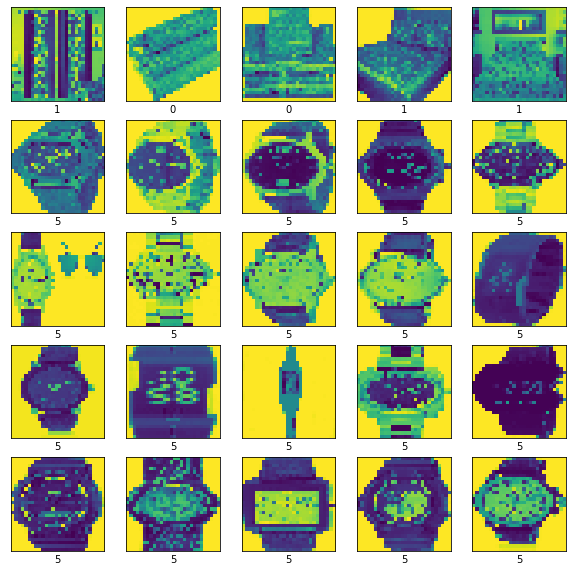

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X_data[i])
    
    
    plt.xlabel(train_Y_target[i])
plt.show()

## Build the Model

### Создание сверточной базы
6 строк кода ниже определяют основу свертки, используя общий шаблон: стек слоев Conv2D и MaxPooling2D .

В качестве входных данных CNN принимает тензоры формы (image_height, image_width, color_channels), игнорируя размер пакета. Если вы новичок в этих измерениях, color_channels относится к (R, G, B). В этом примере вы настроите свою CNN для обработки входных данных формы (28, 28, 1). Вы можете сделать это, передав аргумент input_shape вашему первому слою.

In [49]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

### Montrons l'architecture du modèle jusqu'à présent :

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Выше вы можете видеть, что выходные данные каждого слоя Conv2D и MaxPooling2D представляют собой трехмерный тензор формы (высота, ширина, каналы). Размеры ширины и высоты имеют тенденцию уменьшаться по мере того, как вы углубляетесь в сеть. Количество выходных каналов для каждого слоя Conv2D управляется первым аргументом (например, 32 или 64). Как правило, по мере уменьшения ширины и высоты вы можете позволить (вычислительно) добавить больше выходных каналов в каждый слой Conv2D.

### Добавьте плотные слои сверху

Чтобы завершить модель, вы передадите последний выходной тензор из сверточной базы (формы (4, 4, 64)) в один или несколько плотных слоев для выполнения классификации. Плотные слои принимают в качестве входных данных векторы (которые являются одномерными), а текущий вывод представляет собой трехмерный тензор. Сначала вы сгладите (или развернете) 3D-выход в 1D, а затем добавите один или несколько плотных слоев сверху. Наша база данных имеет 7 выходных классов, поэтому вы используете последний плотный слой с 7 выходными данными.

In [51]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # softmax какой выбрать
model.add(layers.Dense(7))

#### Voici l'architecture complète du modèle :

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Le résumé du réseau montre que la sortie (2, 2, 64) a été aplatie en vecteurs de forme (256) avant de traverser deux couches denses.

Сводка по сети показывает, что выходные данные (2, 2, 64) были сглажены в векторы формы (256) перед прохождением через два плотных слоя.

In [53]:
train_X_data

array([[[0.81960784, 0.82745098, 0.81960784, ..., 0.68235294,
         0.68235294, 0.6745098 ],
        [0.83921569, 0.84313725, 0.43921569, ..., 0.49411765,
         0.68235294, 0.68627451],
        [0.85098039, 0.85098039, 0.85490196, ..., 0.70196078,
         0.69411765, 0.69411765],
        ...,
        [0.52941176, 0.42745098, 0.56862745, ..., 0.16078431,
         0.25098039, 0.39215686],
        [0.6       , 0.57647059, 0.57254902, ..., 0.32941176,
         0.38039216, 0.25098039],
        [0.57647059, 0.56862745, 0.55294118, ..., 0.28235294,
         0.17254902, 0.29803922]],

       [[1.        , 1.        , 1.        , ..., 0.53333333,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 0.48627451,
         0.5372549 , 1.        ],
        [1.        , 1.        , 1.        , ..., 0.58823529,
         0.62352941, 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

In [54]:
train_Y_target

array([1, 0, 0, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 3, 6, 6, 1, 0, 1, 0, 2,
       6, 6, 6, 4, 6, 2, 6, 4, 6, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 6, 6,
       0, 1, 6, 6, 6, 1, 6, 0, 0, 0, 2, 2, 1, 0, 3, 3, 0, 0, 3, 3, 6, 4,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 0, 1, 1, 1,
       0, 3, 0, 6, 0, 4, 3, 0, 3, 4, 1, 0, 4, 3, 2, 2, 2, 2, 3, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 6,
       3, 6, 3, 3, 0, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 6, 3,
       0, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 6, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 3, 6, 3, 3, 3, 6, 3, 6, 3, 3,
       3, 3, 6, 6, 6, 3, 3, 3, 3, 6, 6, 0, 5, 5, 5, 5, 5, 1, 0, 5, 3, 5,
       5, 1, 0, 3, 3, 0, 0, 0, 0, 6, 4, 0, 6, 3, 6,

### Compile the Model

We will compile the model using the adam optimizer and a sparse_categorical_crossentropy loss function. Finally, our metric will be the accuracy.

NB: We use the sparse_categorical_crossentropy because our y labels are in 1D array taking values from 0 to 9. If our y was labeled with one hot encoding we would have used the categorical_crossentropy.

Мы скомпилируем модель, используя оптимизатор adam и функцию потерь sparse_categorical_crossentropy. Наконец, нашей метрикой будет точность.

NB: мы используем sparse_categorical_crossentropy, потому что наши метки y находятся в одномерном массиве со значениями от 0 до 9. Если бы наш y был помечен одной горячей кодировкой, мы бы использовали categorical_crossentropy.

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fit the Model (Обучение модели)

In [56]:
print('X'+str(train_X_data.shape)) 
print('Y'+str(train_Y_target.shape)) 
print('TX'+str(test_x_data.shape)) 
print('TY'+str(test_y_target.shape))

X(800, 28, 28)
Y(800,)
TX(250, 28, 28)
TY(250,)


Avant d'ajuster le modèle, nous devons modifier les dimensions des images de train. Notez qu'à partir de (800, 28, 28) il deviendra (800, 28, 28, 1)

In [57]:
train_X_data = train_X_data.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
test_x_data= test_x_data.reshape(-1,28, 28, 1)
# train_images[...,np.newaxis].shape

In [58]:
print('X'+str(train_X_data.shape)) 
print('Y'+str(train_Y_target.shape)) 
print('TX'+str(test_x_data.shape)) 
print('TY'+str(test_y_target.shape)) 

X(800, 28, 28, 1)
Y(800,)
TX(250, 28, 28, 1)
TY(250,)


Nous n'exécuterons que 10 époques et nous utiliserons une taille de lot égale à 256.

Мы будем запускать только 10 эпох (вы можете запустить больше), и мы будем использовать размер пакета 256.

In [59]:
# Fit the model
model.fit(train_X_data, train_Y_target, epochs=10, batch_size=256)

Epoch 1/10
4/4 [==============================] - 3s 99ms/step - loss: 1.9440 - accuracy: 0.1450
Epoch 2/10
4/4 [==============================] - 0s 86ms/step - loss: 1.9243 - accuracy: 0.1825
Epoch 3/10
4/4 [==============================] - 0s 88ms/step - loss: 1.9148 - accuracy: 0.1925
Epoch 4/10
4/4 [==============================] - 0s 92ms/step - loss: 1.9046 - accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 0s 87ms/step - loss: 1.8886 - accuracy: 0.2188
Epoch 6/10
4/4 [==============================] - 0s 91ms/step - loss: 1.8758 - accuracy: 0.2387
Epoch 7/10
4/4 [==============================] - 0s 88ms/step - loss: 1.8572 - accuracy: 0.3237
Epoch 8/10
4/4 [==============================] - 0s 88ms/step - loss: 1.8271 - accuracy: 0.3413
Epoch 9/10
4/4 [==============================] - 0s 91ms/step - loss: 1.7909 - accuracy: 0.3750
Epoch 10/10
4/4 [==============================] - 0s 89ms/step - loss: 1.7450 - accuracy: 0.3688


### Évaluer le modèle

Nous évaluerons notre modèle sur le jeu de données de test.


In [60]:
history = model.fit(train_X_data, train_Y_target, epochs=10, 
                    validation_data=(test_x_data, test_y_target))


Epoch 1/10
25/25 [==============================] - 1s 45ms/step - loss: 1.6464 - accuracy: 0.3875 - val_loss: 2.0504 - val_accuracy: 0.1040
Epoch 2/10
25/25 [==============================] - 1s 26ms/step - loss: 1.5686 - accuracy: 0.4125 - val_loss: 1.8709 - val_accuracy: 0.2080
Epoch 3/10
25/25 [==============================] - 1s 27ms/step - loss: 1.4506 - accuracy: 0.4775 - val_loss: 2.0379 - val_accuracy: 0.1680
Epoch 4/10
25/25 [==============================] - 1s 26ms/step - loss: 1.3733 - accuracy: 0.4900 - val_loss: 1.8712 - val_accuracy: 0.2240
Epoch 5/10
25/25 [==============================] - 1s 26ms/step - loss: 1.3252 - accuracy: 0.5188 - val_loss: 1.9114 - val_accuracy: 0.2360
Epoch 6/10
25/25 [==============================] - 1s 28ms/step - loss: 1.3000 - accuracy: 0.5275 - val_loss: 1.9889 - val_accuracy: 0.2160
Epoch 7/10
25/25 [==============================] - 1s 28ms/step - loss: 1.2489 - accuracy: 0.5437 - val_loss: 1.8770 - val_accuracy: 0.2320
Epoch 8/10
25

8/8 - 0s - loss: 2.0063 - accuracy: 0.2640 - 94ms/epoch - 12ms/step


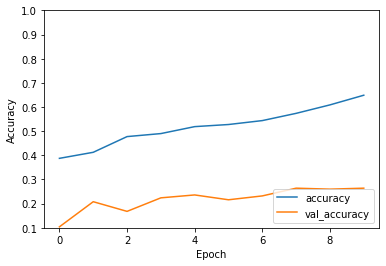

In [61]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x_data, test_y_target, verbose=2)

### Make Predictions

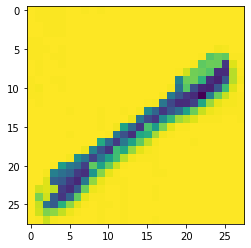

4


In [62]:
# Choose a random test image
random_inx = np.random.choice(test_x_data.shape[0])
test_image = test_x_data[random_inx]
plt.imshow(test_image)
plt.show()

print(test_y_target[random_inx])

In [63]:
test_image = test_image.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!

In [64]:
predictions_image = model.predict(test_image)
print(predictions_image)

1/1 [==============================] - 0s 250ms/step
[[ 0.37034142 -1.9317837   0.6844445  -1.4900645   3.363416   -3.2589633
   0.6235095 ]]


In [65]:
print(f'Model Prediction: {[np.argmax(predictions_image)]}')

Model Prediction: [4]


In [66]:
# Get the model predictions
predictions = model.predict(test_x_data)

8/8 [==============================] - 0s 9ms/step


In [67]:
predictions

array([[-1.5833654 , -0.3514597 ,  1.2197212 , ...,  0.03173956,
        -2.7188804 , -0.41267142],
       [ 0.23898368, -0.41808313,  3.015081  , ...,  0.63200366,
        -2.9945138 , -1.3251071 ],
       [ 0.24796349, -0.52767843,  2.3805234 , ...,  0.61495996,
        -2.6304932 , -1.0044464 ],
       ...,
       [ 0.6725907 ,  0.54368067,  0.55110055, ..., -0.60804284,
        -1.579182  , -0.30627427],
       [ 0.899217  ,  0.9835913 ,  1.6002256 , ..., -0.8528259 ,
        -2.1434882 , -2.0854745 ],
       [-0.37047383,  1.6491468 , -0.14550504, ..., -2.7332027 ,
        -1.229274  , -0.44019815]], dtype=float32)

In [76]:
y_predicted_counts=np.argmax(predictions, axis=-1)

In [77]:
y_predicted_counts

array([2, 2, 2, 1, 2, 2, 6, 6, 6, 2, 2, 3, 6, 1, 4, 1, 5, 4, 6, 4, 2, 6,
       1, 2, 6, 2, 5, 2, 2, 0, 4, 6, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 0, 6, 2, 5, 2, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 6, 4, 1, 4, 2,
       1, 6, 2, 2, 2, 3, 4, 1, 5, 2, 6, 0, 0, 1, 0, 1, 1, 6, 2, 4, 5, 5,
       0, 4, 2, 2, 0, 4, 2, 0, 1, 0, 4, 3, 6, 3, 6, 2, 5, 1, 6, 5, 5, 0,
       1, 3, 1, 0, 3, 6, 4, 2, 6, 5, 0, 2, 1, 4, 2, 4, 2, 1, 6, 5, 6, 5,
       5, 2, 1, 2, 4, 2, 6, 0, 2, 4, 5, 2, 2, 1, 6, 6, 5, 6, 1, 2, 2, 4,
       5, 2, 4, 2, 1, 1, 2, 1, 1, 4, 1, 4, 6, 1, 1, 5, 1, 1, 5, 1, 2, 0,
       0, 4, 2, 1, 0, 3, 1, 0, 6, 1, 0, 2, 2, 1, 2, 2, 4, 2, 2, 5, 2, 5,
       0, 6, 0, 0, 6, 6, 2, 0, 2, 1, 4, 2, 5, 4, 2, 6, 1, 4, 0, 0, 0, 2,
       0, 4, 1, 2, 6, 6, 2, 2, 2, 2, 4, 0, 6, 2, 5, 2, 5, 2, 5, 6, 4, 1,
       4, 0, 1, 2, 0, 0, 2, 1], dtype=int64)

In [ ]:
# матрица конфьюзон рекол

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

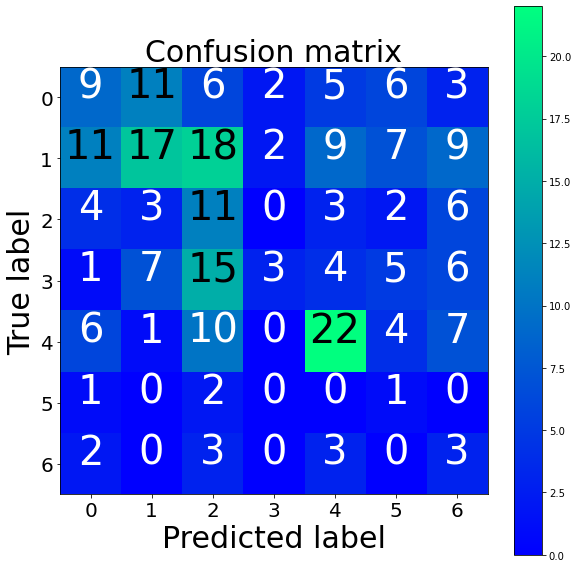

[[ 9 11  6  2  5  6  3]
 [11 17 18  2  9  7  9]
 [ 4  3 11  0  3  2  6]
 [ 1  7 15  3  4  5  6]
 [ 6  1 10  0 22  4  7]
 [ 1  0  2  0  0  1  0]
 [ 2  0  3  0  3  0  3]]


In [75]:
cm = confusion_matrix(test_y_target, y_predicted_counts)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm,classes=['0', '1','2', '3','4','5','6'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [80]:
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score

In [94]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [95]:
accuracy_model, precision_model, recall_model, f1_model = get_metrics(test_y_target, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_model, precision_model, 
                                                                       recall_model, f1_model))

accuracy = 0.264, precision = 0.362, recall = 0.264, f1 = 0.275


### Utilisation du VGG-16 pré-entraîné

In [139]:
def create_train_data_VGG16():
    # Creating an empty list where we should store the training data
    # after a little preprocessing of the data
    training_data_VGG16 = []
    target_VGG16=[]
 
    # tqdm is only used for interactive loading
    # loading the training data
    for index, row in df[['image','y_cat']].iterrows():
     
        # labeling the images
        label = row[1]
 
        path = os.path.join(TRAIN_DIR, row[0])
 
        # loading the image from the path and then converting them into
        # grayscale for easier covnet prob
        img = cv2.imread(path)
 
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (224, 224), 3)
        
 
        # final step-forming the training data list with numpy array of the images
        training_data_VGG16.append(np.array(img))
        target_VGG16.append(np.array(label))
        

    # shuffling of the training data to preserve the random state of our data
    #shuffle(training_data)
 
    # saving our trained data for further uses if required
    np.save('training_data_VGG16.npy', training_data_VGG16)
    np.save('target_VGG16.npy', target_VGG16)
    return training_data_VGG16, target_VGG16

In [140]:
'''Running the training and the testing in the train and test dataset for our model'''
training_data_VGG16, target_VGG16 = create_train_data_VGG16()  #_, _ = create_train_data()
#test_data = process_test_data()
training_data_VGG16 = np.load('training_data_VGG16.npy')
target_VGG16 = np.load('target_VGG16.npy')

In [141]:
#Splitting the testing data and training data
train_X_data_VGG16 = training_data_VGG16[:800]
train_Y_target_VGG16 = target_VGG16[:800]

test_x_data_VGG16 = training_data_VGG16[800:]
test_y_target_VGG16 = target_VGG16[800:]

In [142]:
# Normalize pixel values to be between 0 and 1
train_X_data_VGG16, test_x_data_VGG16 = train_X_data_VGG16 / 255.0, test_x_data_VGG16 / 255.0

In [143]:
print('X'+str(train_X_data_VGG16.shape)) 
print('Y'+str(train_Y_target_VGG16.shape)) 
print('TX'+str(test_x_data_VGG16.shape)) 
print('TY'+str(test_y_target_VGG16.shape))

X(800, 224, 224, 3)
Y(800,)
TX(250, 224, 224, 3)
TY(250,)


In [144]:
train_X_data_VGG16 = train_X_data_VGG16.reshape(-1,224, 224, 3)   #Reshape for CNN -  should work!!
test_x_data_VGG16= test_x_data_VGG16.reshape(-1,224, 224, 3)

In [145]:
from keras.utils import to_categorical

y_train = to_categorical(train_Y_target_VGG16, 7)
print(y_train.shape)

y_test=to_categorical(test_y_target_VGG16, 7)
print(y_test.shape)

(800, 7)
(250, 7)


In [146]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model

In [147]:
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model_1 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model_1.output

x = layers.Flatten()(x)

# Ajouter la nouvelle couche fully-connected pour la classification à 7 classes
predictions = Dense(7, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model_1.input, outputs=predictions)

In [148]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [149]:
for layer in new_model.layers:
    layer.trainable = True

In [151]:
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# from tensorflow.keras.optimizers import SGD
# new_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [ ]:
# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(train_X_data_VGG16, y_train, epochs=10, batch_size=256, verbose=2)

# history = new_model.fit(train_X_data_VGG16, y_train, epochs=10, 
                    #validation_data=(test_x_data_VGG16, y_test))


## SIFT (Scale Invariant Feature Transform) technique

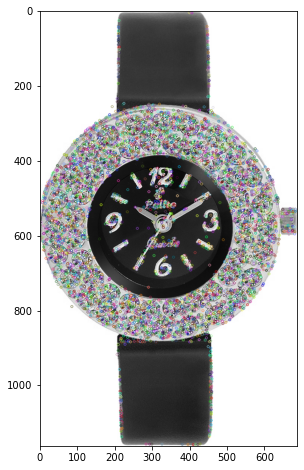

In [111]:
#reading image
img1 = cv2.imread('montre.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1 = sift.detect(img1,None)

plt.figure(figsize = (8,8))
img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)


### Correspondance des fonctionnalités
Nous allons maintenant utiliser les fonctionnalités SIFT pour la correspondance des fonctionnalités. A cet effet, j'ai téléchargé deux images de la montre.

Voici les deux images que j'ai utilisées :

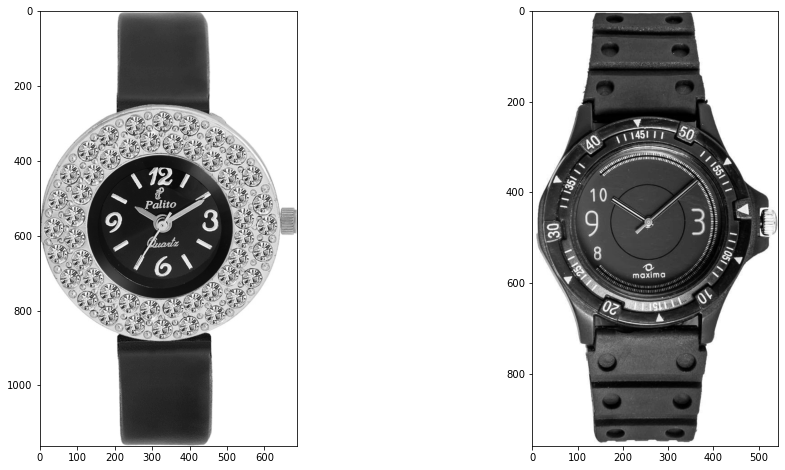

In [117]:
# read images
img1 = cv2.imread('montre.jpg')  
img2 = cv2.imread('montre_2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

Maintenant, pour ces deux images, nous allons générer les fonctionnalités SIFT. Tout d'abord, nous devons construire un objet SIFT, puis utiliser la fonction detectAndCompute pour obtenir les points clés. Il renverra deux valeurs - les points clés et les descripteurs.

Déterminons les points clés et imprimons le nombre total de points clés trouvés dans chaque image :

In [118]:
#sift
sift = cv2.SIFT_create()

keypoints_1 = sift.detect(img1,None)
keypoints_2= sift.detect(img2,None)

len(keypoints_1), len(keypoints_2)

(5626, 2189)

In [119]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

Ensuite, essayons de faire correspondre les caractéristiques de l'image 1 avec les caractéristiques de l'image 2. Nous utiliserons la fonction match() du module BFmatcher (brute force match). De plus, nous tracerons des lignes entre les caractéristiques qui correspondent dans les deux images. Cela peut être fait en utilisant la fonction drawMatches dans OpenCV.

Далее попробуем сопоставить характеристики фрейма 1 с характеристиками фрейма 2. Мы воспользуемся функцией match() модуля BFmatcher (совпадение грубой силы). Кроме того, мы нарисуем линии между функциями, которые совпадают на двух изображениях. Это можно сделать с помощью функции drawMatches в OpenCV.

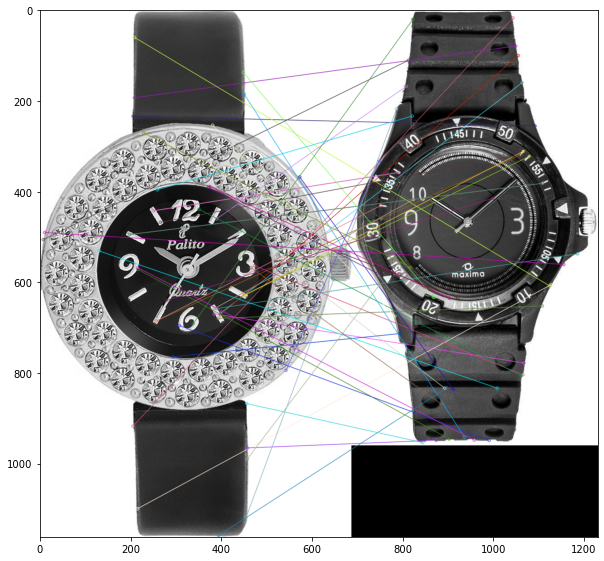

(<matplotlib.image.AxesImage at 0x2540141d250>, None)

In [120]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

plt.figure(figsize = (10,10))
plt.imshow(img3),plt.show()

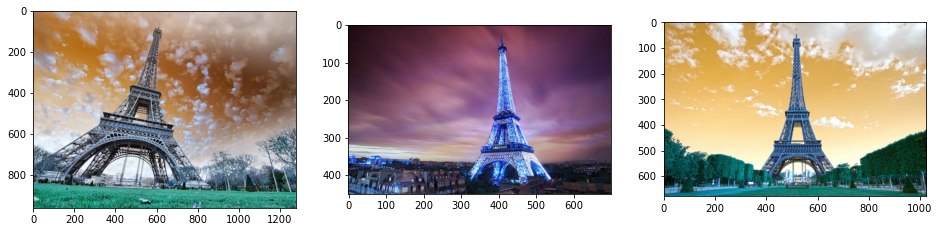

In [3]:
img1 = cv2.imread('tour_Eiffel.jpg')  
img2 = cv2.imread('tour_Eiffel_2.jpg')
img3 = cv2.imread('tour_Eiffel_3.jpg')

figure, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

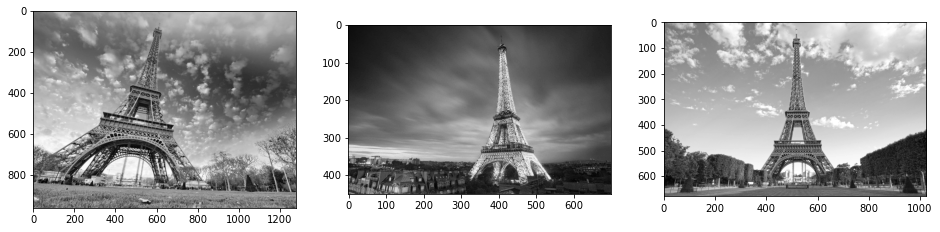

In [5]:
# read images
# read images
img1 = cv2.imread('tour_Eiffel.jpg')  
img2 = cv2.imread('tour_Eiffel_2.jpg')
img3 = cv2.imread('tour_Eiffel_3.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[2].imshow(img3, cmap='gray')

In [5]:
#sift
sift = cv2.SIFT_create()

keypoints_1 = sift.detect(img1,None)
keypoints_2= sift.detect(img2,None)
keypoints_3= sift.detect(img3,None)

len(keypoints_1), len(keypoints_2), len(keypoints_3)

(9963, 4008, 1269)

In [6]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(img3,None)

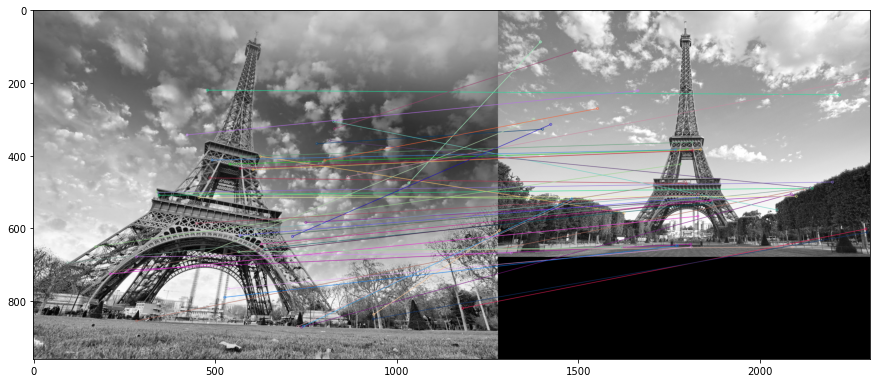

(<matplotlib.image.AxesImage at 0x26653836dc0>, None)

In [7]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img4 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2,matches[:50], img2, flags=2)

plt.figure(figsize = (15,15))
plt.imshow(img4),plt.show()

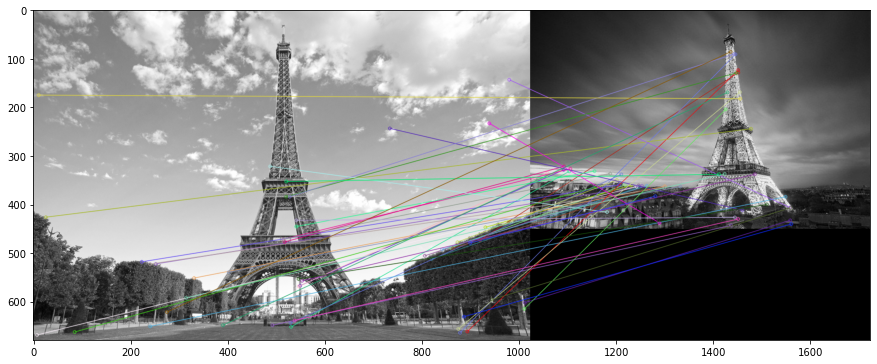

(<matplotlib.image.AxesImage at 0x2665394f670>, None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_2,descriptors_3)
matches = sorted(matches, key = lambda x:x.distance)

img5 = cv2.drawMatches(img2, keypoints_2, img3, keypoints_3,matches[:50], img2, flags=2)

plt.figure(figsize = (15,15))
plt.imshow(img5),plt.show()

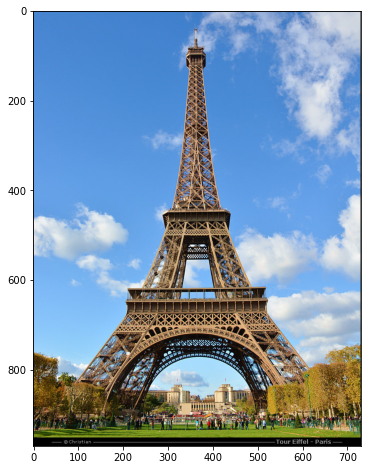

In [34]:
# read images
img6=sk.io.imread('tour_eiffel_paris.jpg')

plt.figure(figsize = (8,8))
plt.imshow(img6)

In [35]:
img6

array([[[ 14,   0,   0],
        [  5,   5,  43],
        [ 20,   0,   9],
        ...,
        [  0,   0,   4],
        [  0,   3,  10],
        [  0,   0,   4]],

       [[  0,   9,   7],
        [ 38, 130, 181],
        [ 68, 150, 190],
        ...,
        [210, 215, 219],
        [207, 210, 217],
        [  1,   2,   6]],

       [[  7,   0,  14],
        [ 70, 141, 219],
        [ 69, 138, 207],
        ...,
        [209, 218, 223],
        [216, 219, 226],
        [  0,   0,   4]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [36]:
import os
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [37]:
img6=sk.io.imread('tour_eiffel_paris.jpg')

In [38]:
image_to_transform = img6

transformed_image = random_rotation(image_to_transform)
transformed_image = random_noise(transformed_image)
transformed_image = horizontal_flip(transformed_image)

In [39]:
# write image to the disk
sk.io.imsave('tour_Eiffel_3_transformed.jpg', transformed_image)

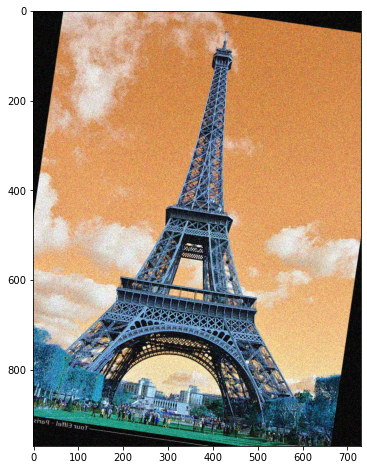

In [40]:
img7 = cv2.imread('tour_Eiffel_3_transformed.jpg')

plt.figure(figsize = (8,8))
plt.imshow(img7)

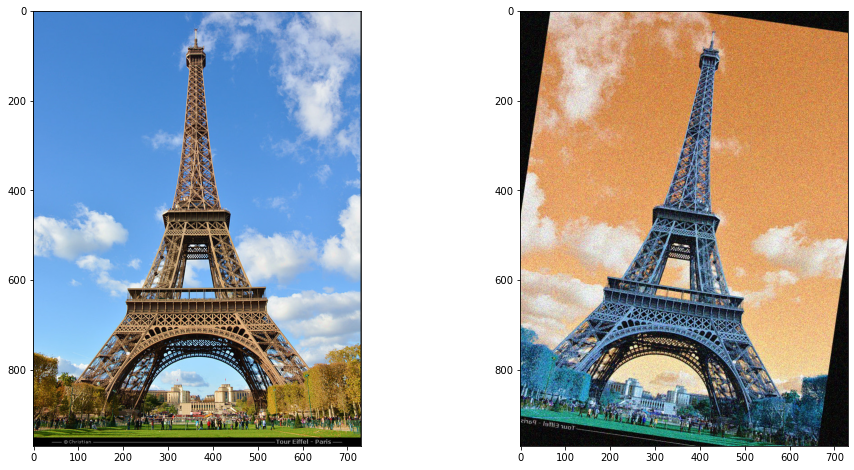

In [41]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img6)
ax[1].imshow(img7)

In [42]:
#sift
sift = cv2.SIFT_create()

keypoints_1 = sift.detect(img6,None)
keypoints_2= sift.detect(img7,None)

len(keypoints_1), len(keypoints_2)

(3555, 4324)

In [43]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img6,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img7,None)


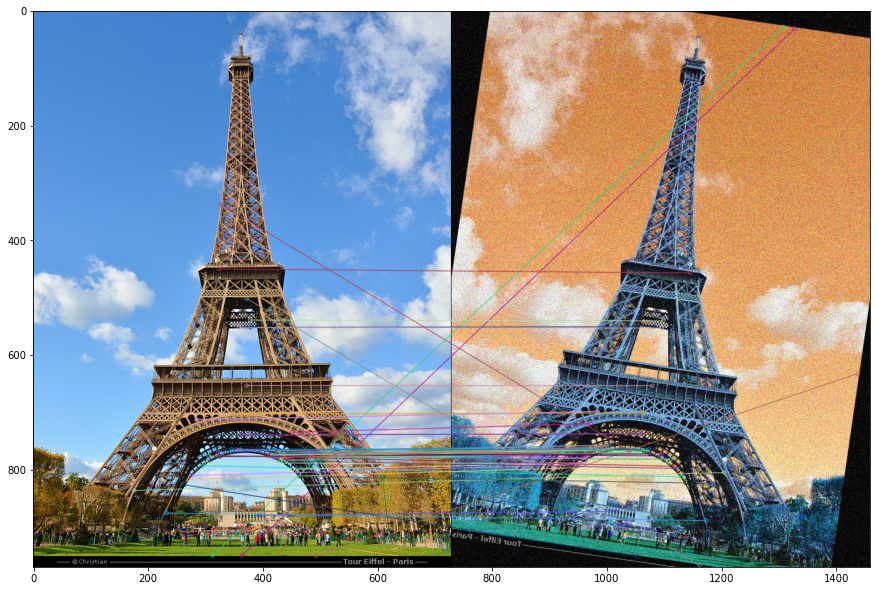

(<matplotlib.image.AxesImage at 0x2613e271df0>, None)

In [44]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img8 = cv2.drawMatches(img6, keypoints_1, img7, keypoints_2,matches[:50], img7, flags=2)

plt.figure(figsize = (15,15))
plt.imshow(img8),plt.show()